In [4]:
import requests
response = requests.get("http://apis.data.go.kr/1471000/FoodNtrIrdntInfoService1/getFoodNtrItdntList1",
                      params = {"ServiceKey":"LArp84cYD19lK3jAxCtQOuKp3vEIJdQ5uWk3Rm5ln0MIvNpg+AV91CtdmjmUaoIG7VP9bm8/s06HSx4JtYW60w==",
                      "numOfRows":100,
                      "pageNo":100})
# response.header
response.status_code

200

In [5]:
import xmltodict
a = xmltodict.parse(response.text)

In [11]:
food = a['response']['body']['items']['item']

In [12]:
import pandas as pd

In [15]:
food = pd.DataFrame(food)
food

,DESC_KOR,SERVING_WT,NUTR_CONT1,NUTR_CONT2,NUTR_CONT3,NUTR_CONT4,NUTR_CONT5,NUTR_CONT6,NUTR_CONT7,NUTR_CONT8,NUTR_CONT9,BGN_YEAR,ANIMAL_PLANT
0,콘푸라이트1/3라이트,30,34.02,7.74,0.39,0.17,0.60,56.61,0.00,0.12,0.00,2017,동서식품
1,콘후레이크,30,112.20,24.60,1.83,0.73,1.82,233.28,0.00,0.63,0.00,2015,동서식품
2,콘후레이크,30,33.66,7.38,0.55,0.22,0.60,69.98,0.00,0.19,0.00,2017,동서식품
3,쵸코후레이크,30,115.80,25.20,1.26,1.08,9.60,161.70,0.00,0.99,0.00,2015,동서식품
4,쵸코후레이크,30,34.74,7.56,0.38,0.32,2.88,48.51,0.00,0.30,0.00,2017,동서식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,？？니 청포도,10,18.19,3.62,0.04,0.42,0.55,0.09,0.01,0.41,0.00,2017,롯데제과
96,박찬회연양갱,50,142.85,35.30,1.25,0.10,25.25,1.25,0.00,0.00,0.00,2012,롯데제과
97,박찬회연양갱,50,158.72,39.22,1.39,0.11,12.62,1.39,0.00,0.00,0.00,2017,롯데제과
98,"초코파이류,몽쉘통통",70,349.30,33.81,3.15,22.26,N/A,86.10,N/A,N/A,N/A,2006,롯데제과


In [23]:
del food["BGN_YEAR"]
del food["ANIMAL_PLANT"]
del food["NUTR_CONT8"]
del food["NUTR_CONT9"]

food

,DESC_KOR,SERVING_WT,NUTR_CONT1,NUTR_CONT2,NUTR_CONT3,NUTR_CONT4,NUTR_CONT5,NUTR_CONT6,NUTR_CONT7
0,콘푸라이트1/3라이트,30,34.02,7.74,0.39,0.17,0.60,56.61,0.00
1,콘후레이크,30,112.20,24.60,1.83,0.73,1.82,233.28,0.00
2,콘후레이크,30,33.66,7.38,0.55,0.22,0.60,69.98,0.00
3,쵸코후레이크,30,115.80,25.20,1.26,1.08,9.60,161.70,0.00
4,쵸코후레이크,30,34.74,7.56,0.38,0.32,2.88,48.51,0.00
...,...,...,...,...,...,...,...,...,...
95,？？니 청포도,10,18.19,3.62,0.04,0.42,0.55,0.09,0.01
96,박찬회연양갱,50,142.85,35.30,1.25,0.10,25.25,1.25,0.00
97,박찬회연양갱,50,158.72,39.22,1.39,0.11,12.62,1.39,0.00
98,"초코파이류,몽쉘통통",70,349.30,33.81,3.15,22.26,N/A,86.10,N/A


In [24]:
food.columns = ['식품명','1회제공량(g)','열량(kcal)','탄수화물(g)','단백질(g)','지방(g)','당류(g)','나트륨(mg)','콜레스테롤(mg)']

In [25]:
food

,식품명,1회제공량(g),열량(kcal),탄수화물(g),단백질(g),지방(g),당류(g),나트륨(mg),콜레스테롤(mg)
0,콘푸라이트1/3라이트,30,34.02,7.74,0.39,0.17,0.60,56.61,0.00
1,콘후레이크,30,112.20,24.60,1.83,0.73,1.82,233.28,0.00
2,콘후레이크,30,33.66,7.38,0.55,0.22,0.60,69.98,0.00
3,쵸코후레이크,30,115.80,25.20,1.26,1.08,9.60,161.70,0.00
4,쵸코후레이크,30,34.74,7.56,0.38,0.32,2.88,48.51,0.00
...,...,...,...,...,...,...,...,...,...
95,？？니 청포도,10,18.19,3.62,0.04,0.42,0.55,0.09,0.01
96,박찬회연양갱,50,142.85,35.30,1.25,0.10,25.25,1.25,0.00
97,박찬회연양갱,50,158.72,39.22,1.39,0.11,12.62,1.39,0.00
98,"초코파이류,몽쉘통통",70,349.30,33.81,3.15,22.26,N/A,86.10,N/A


In [4]:
import requests
response = requests.get("https://ecos.bok.or.kr/api",
                       params = {"서비스명":"KeyStatisticList",
                                "인증키":"FVBL2QLKSSYWVTTQQSO5 ",
                                "요청유형":"xml",
                                "언어구분":"kr",
                                "요청시작건수":"1",
                                "요청종료건수":"10"})
response.status_code
# response.header

404

In [74]:
import pandas as pd
lotto=pd.read_csv("datas/기획재정부_온라인복권 1등 당첨 판매점 현황 정보_20200518.csv", encoding='euc-kr')
lotto
# 지역별 당첨횟수
# 서울 구별 당첨횟수
# 어느 상호가 제일 많은지

,순번,상호,지역,1등 자동 당첨 건수
0,1,일등복권편의점,대구 달서구,5
1,2,오케이상사,서울 서초구,3
2,3,세진전자통신,대구 서구,2
3,4,라이프마트,인천 중구,2
4,5,스파,서울 노원구,2
...,...,...,...,...
325,326,GS25(수원행복점),경기 수원시,1
326,327,CU(강릉내곡점),강원 강릉시,1
327,328,GS25(청주수곡점),충북 청주시,1
328,329,GS25(천안시민점),충남 천안시,1


In [58]:

lotto['지역'] = lotto['지역'].str[0:2]
lotto

,순번,상호,지역,1등 자동 당첨 건수
0,1,일등복권편의점,대구,5
1,2,오케이상사,서울,3
2,3,세진전자통신,대구,2
3,4,라이프마트,인천,2
4,5,스파,서울,2
...,...,...,...,...
325,326,GS25(수원행복점),경기,1
326,327,CU(강릉내곡점),강원,1
327,328,GS25(청주수곡점),충북,1
328,329,GS25(천안시민점),충남,1


In [76]:
seoul = lotto.loc[lotto['지역'].str[0:2] == '서울']
seoul

,순번,상호,지역,1등 자동 당첨 건수
1,2,오케이상사,서울 서초구,3
4,5,스파,서울 노원구,2
20,21,인터넷 복권판매사이트,서울 서초구,1
22,23,토큰판매소,서울 송파구,1
23,24,잠실매점,서울 송파구,1
...,...,...,...,...
89,90,세븐일레븐강서화곡예스점,서울 강서구,1
90,91,복권천국,서울 성동구,1
315,316,CU(수유대로점),서울 강북구,1
316,317,GS25(삼성역점),서울 강남구,1


In [53]:
seoul = lotto.loc[lotto['지역'].str[0:2] == '충북']
seoul['지역'].str[2:].value_counts()

 청주시    7
 음성군    2
 제천시    1
 충주시    1
 옥천군    1
 진천군    1
Name: 지역, dtype: int64

In [26]:
lotto.nlargest(20, ['1등 자동 당첨 건수']).value_counts('상호')

상호
GS25(대구교대점)    1
GS25(천안성지점)    1
해피+24시편의점      1
필로또복권          1
토큰박스           1
탑로또            1
일등복권편의점        1
오케이상사          1
오천억복권방         1
알리바이(나주점)      1
스파             1
세진전자통신         1
목화휴게소          1
로또명당목련         1
라이프마트          1
또또복권방          1
동명슈퍼           1
노다지복권방         1
Letsgo복권유통     1
흥부네박터졌네        1
dtype: int64

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

NanumGothic
Noto Sans KR
NanumGothic
Noto Sans KR
Noto Sans KR
NanumMyeongjo
Noto Sans KR
NanumGothic
Black Han Sans
Noto Sans KR
NanumMyeongjo
NanumMyeongjo
Noto Sans KR


In [56]:
# Set font family globally
mpl.rcParams['font.family'] = 'Black Han Sans'
print(mpl.rcParams['font.family'])

['Black Han Sans']


In [61]:
import seaborn as sns

In [63]:
lotto['지역'] = lotto['지역'].str[0:2]


,순번,상호,지역,1등 자동 당첨 건수
237,238,희망로또,강원,1
242,243,돈벼락복권,강원,1
241,242,진평양행,강원,1
240,241,우두로또,강원,1
239,240,퇴계로또,강원,1
...,...,...,...,...
249,250,홈짱,충북,1
250,251,로또판매점,충북,1
251,252,쿡쿡로또명당,충북,1
245,246,혹시나도,충북,1


<AxesSubplot:xlabel='지역', ylabel='count'>

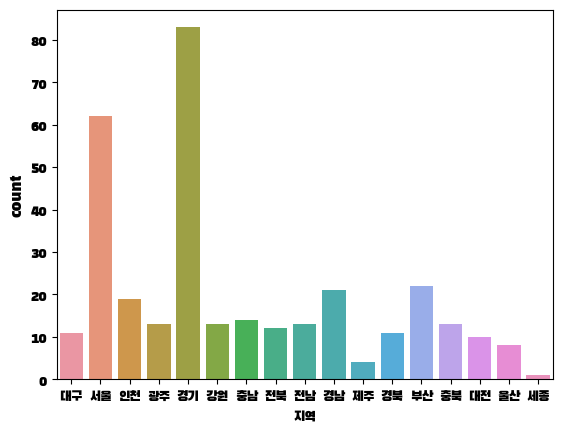

In [64]:
sns.countplot(data=lotto, x="지역")

In [85]:
seoul = lotto.loc[lotto['지역'].str[0:2] == '서울']
seoul.nlargest(5, '1등 자동 당첨 건수')
sns.countplot(data=seoul.nlargest(5, '1등 자동 당첨 건수'), x="지역")

,순번,상호,지역,1등 자동 당첨 건수
1,2,오케이상사,서울 서초구,3
4,5,스파,서울 노원구,2
20,21,인터넷 복권판매사이트,서울 서초구,1
22,23,토큰판매소,서울 송파구,1
23,24,잠실매점,서울 송파구,1
